In [2]:
import glob
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath


# https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-pylab
%pylab
%matplotlib inline 
import xarray as xr

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
xr

<module 'xarray' from '/home/circadian/.virtualenvs/exp/lib/python3.9/site-packages/xarray/__init__.py'>

In [4]:
hemisphere = "sh"
data_files = glob.glob(os.path.expandvars("$HOME/scratch/data/{}/siconca/2000/*/*.nc").format(hemisphere))

In [5]:
print(data_files)

['/home/circadian/scratch/data/sh/siconca/2000/01/ice_conc_sh_ease2-250_cdr-v2p0_200001021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/02/ice_conc_sh_ease2-250_cdr-v2p0_200002021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/03/ice_conc_sh_ease2-250_cdr-v2p0_200003021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/04/ice_conc_sh_ease2-250_cdr-v2p0_200004021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/05/ice_conc_sh_ease2-250_cdr-v2p0_200005021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/06/ice_conc_sh_ease2-250_cdr-v2p0_200006021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/07/ice_conc_sh_ease2-250_cdr-v2p0_200007021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/08/ice_conc_sh_ease2-250_cdr-v2p0_200008021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/09/ice_conc_sh_ease2-250_cdr-v2p0_200009021200.nc', '/home/circadian/scratch/data/sh/siconca/2000/10/ice_conc_sh_ease2-250_cdr-v2p0_200010021200.nc', '/home/circadian/sc

In [6]:
ds = xr.open_mfdataset(data_files)

In [7]:
ds

<xarray.Dataset>
Dimensions:                   (time: 12, nv: 2, xc: 432, yc: 432)
Coordinates:
  * time                      (time) datetime64[ns] 2000-01-02T12:00:00 ... 2...
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid    (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ice_conc                  (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    raw_ice_conc_values       (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    total_standard_error      (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    smearing_standard_error   (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    algorithm_standard_error  (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    status_flag               (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        -90.0
    ...                        ...
    tracking_id:               1ba70a51-6fcc-437e-bbc2-c56fe83568a0
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0

In [18]:

fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)
time = 0
ice_conc = ds.variables['ice_conc'][time, :, :]
lats = ds[dict(time=[time], nv=[0])]['lat']
lons = ds[dict(time=[time], nv=[0])]['lon']

plt.contourf(lons, lats, ice_conc, 60,
             transform=ccrs.PlateCarree())
plt.show()

ValueError: Sequences of multi-polygons are not valid arguments

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7faa118d0b80> (for post_execute):


ValueError: Sequences of multi-polygons are not valid arguments

ValueError: Sequences of multi-polygons are not valid arguments

<Figure size 720x360 with 1 Axes>

In [16]:
ds[dict(time=[0], nv=[0])]['ice_conc'][0,:,:]


<xarray.DataArray 'ice_conc' (yc: 432, xc: 432)>
dask.array<getitem, shape=(432, 432), dtype=float64, chunksize=(432, 432), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2000-01-02T12:00:00
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lat      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_error status_flag
    comment:              this field is the primary sea ice concentration est...

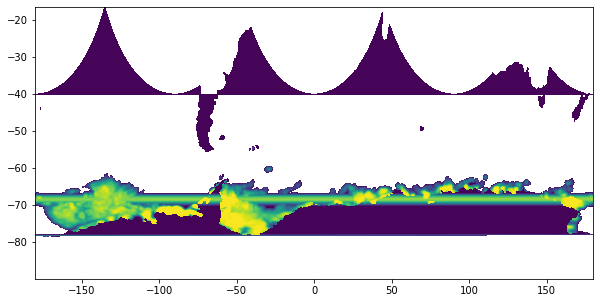

In [22]:
fig = plt.figure(figsize=[10, 5])

time = 0
ice_conc = ds.variables['ice_conc'][time, :, :]
lats = ds[dict(time=[time], nv=[0])]['lat']
lons = ds[dict(time=[time], nv=[0])]['lon']

plt.contourf(lons, lats, ice_conc, 60)
plt.show()